# Ford GoBike System Data Explanation:  Looking at Types Of Users
## by Caleb Manske


## Investigation Overview

> With an exploration of the Bay Wheels's Ford GoBike system done previously, this earlier analysis found many interesting aspects.  One cohesive theme, which I will reiterate here, was the difference between customers and subscribers.

## Dataset Overview

> Bay Wheels's trip data for public use in the years of 2018 to 2019.  The dataset features data relevant to Ford's GoBike bikeshare program with regards, to date, time, distance, location, and use.  https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1: Amount Of User Types)

> Here is a graph to see the proportion count of user type.  We find that there is that there are a large porportion of subscribers in the program to customers who are not enrolled in the program.  

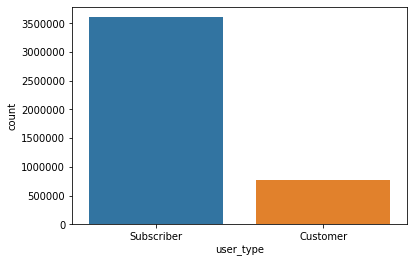

In [3]:
sb.countplot(data=df_clean,x='user_type')

## (Visualization 2: Weekly usage of the bike share system per user type)

> Among the subscribers, we find that Sunday is not utilized the most but is among the customers. Among the customers, we find that Tuesday is not utilized as much as it is for subscribers. This clearly shows, subscribers and customers have a very different life and workstyle.

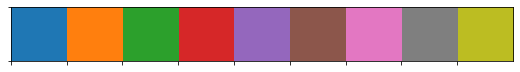

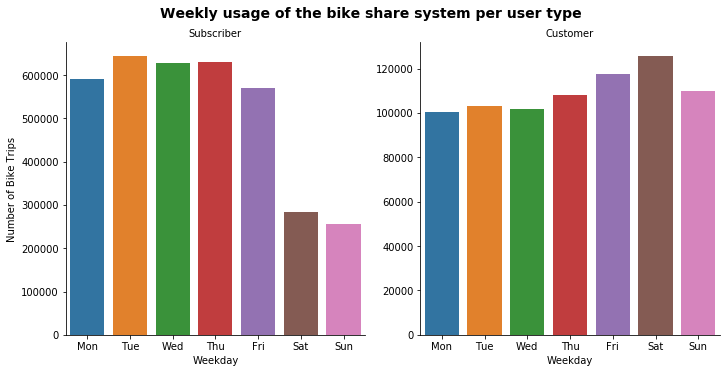

In [4]:
colorbar = sb.palplot(sb.color_palette(n_colors=9))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = colorbar, order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 3: Amont of time spent per day per 'User Type')

> Furthermore, we find customers again would use this on their non-working day as leisure but especially at a longer time frames.

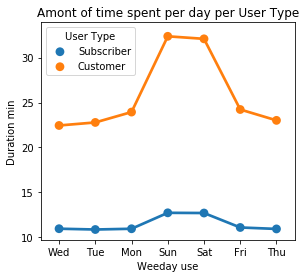

In [5]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=df_clean, x='start_time_weekday', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Weeday use')
plt.ylabel('Duration min')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type')

## (Visualization 4: Trip duration (sec) per user type)

> From this box plot, we find that customers have a wider range of trip duration use for short trips. We can almost imply that customers are more likely to be using this service for leisure and fun based on frequent weekend use, more time spent per weekend vs weekday, and more variety of second durations as now shown.

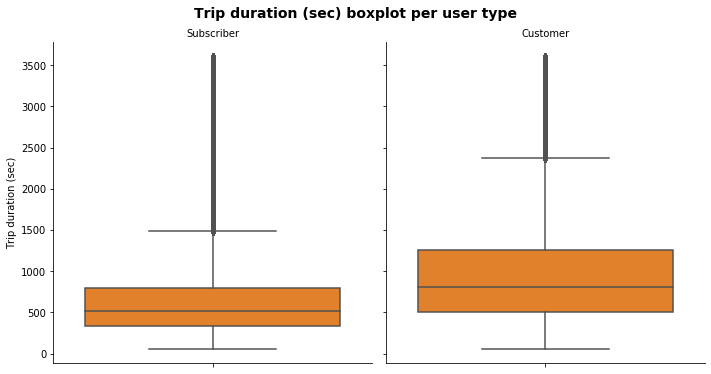

In [6]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = sb.color_palette()[1])
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 4: Duration on bike for each day in each month)

>Will be showing customers, subscribers, and customers and subscribers together in time used per day per month. Firstly, here are the both. The pattern is very similar among subscribers and customers with rising and lowering in cycles. The peaks might be the difference between weekend use and weekday use as that was evident earlier in a prior graph. Interestingly this graph points out big spikes in a month.

In [7]:
df_customer = df_clean.query('user_type == "Customer"')

df_subscriber = df_clean.query('user_type == "Subscriber"')

def line_graph(data_):
    bin_edges = np.arange(0,31,1)
    g=sb.FacetGrid(data=data_, col='month', col_wrap=2, size=5,aspect = 1.5)
    g.map(sb.pointplot,'day', 'duration_min')

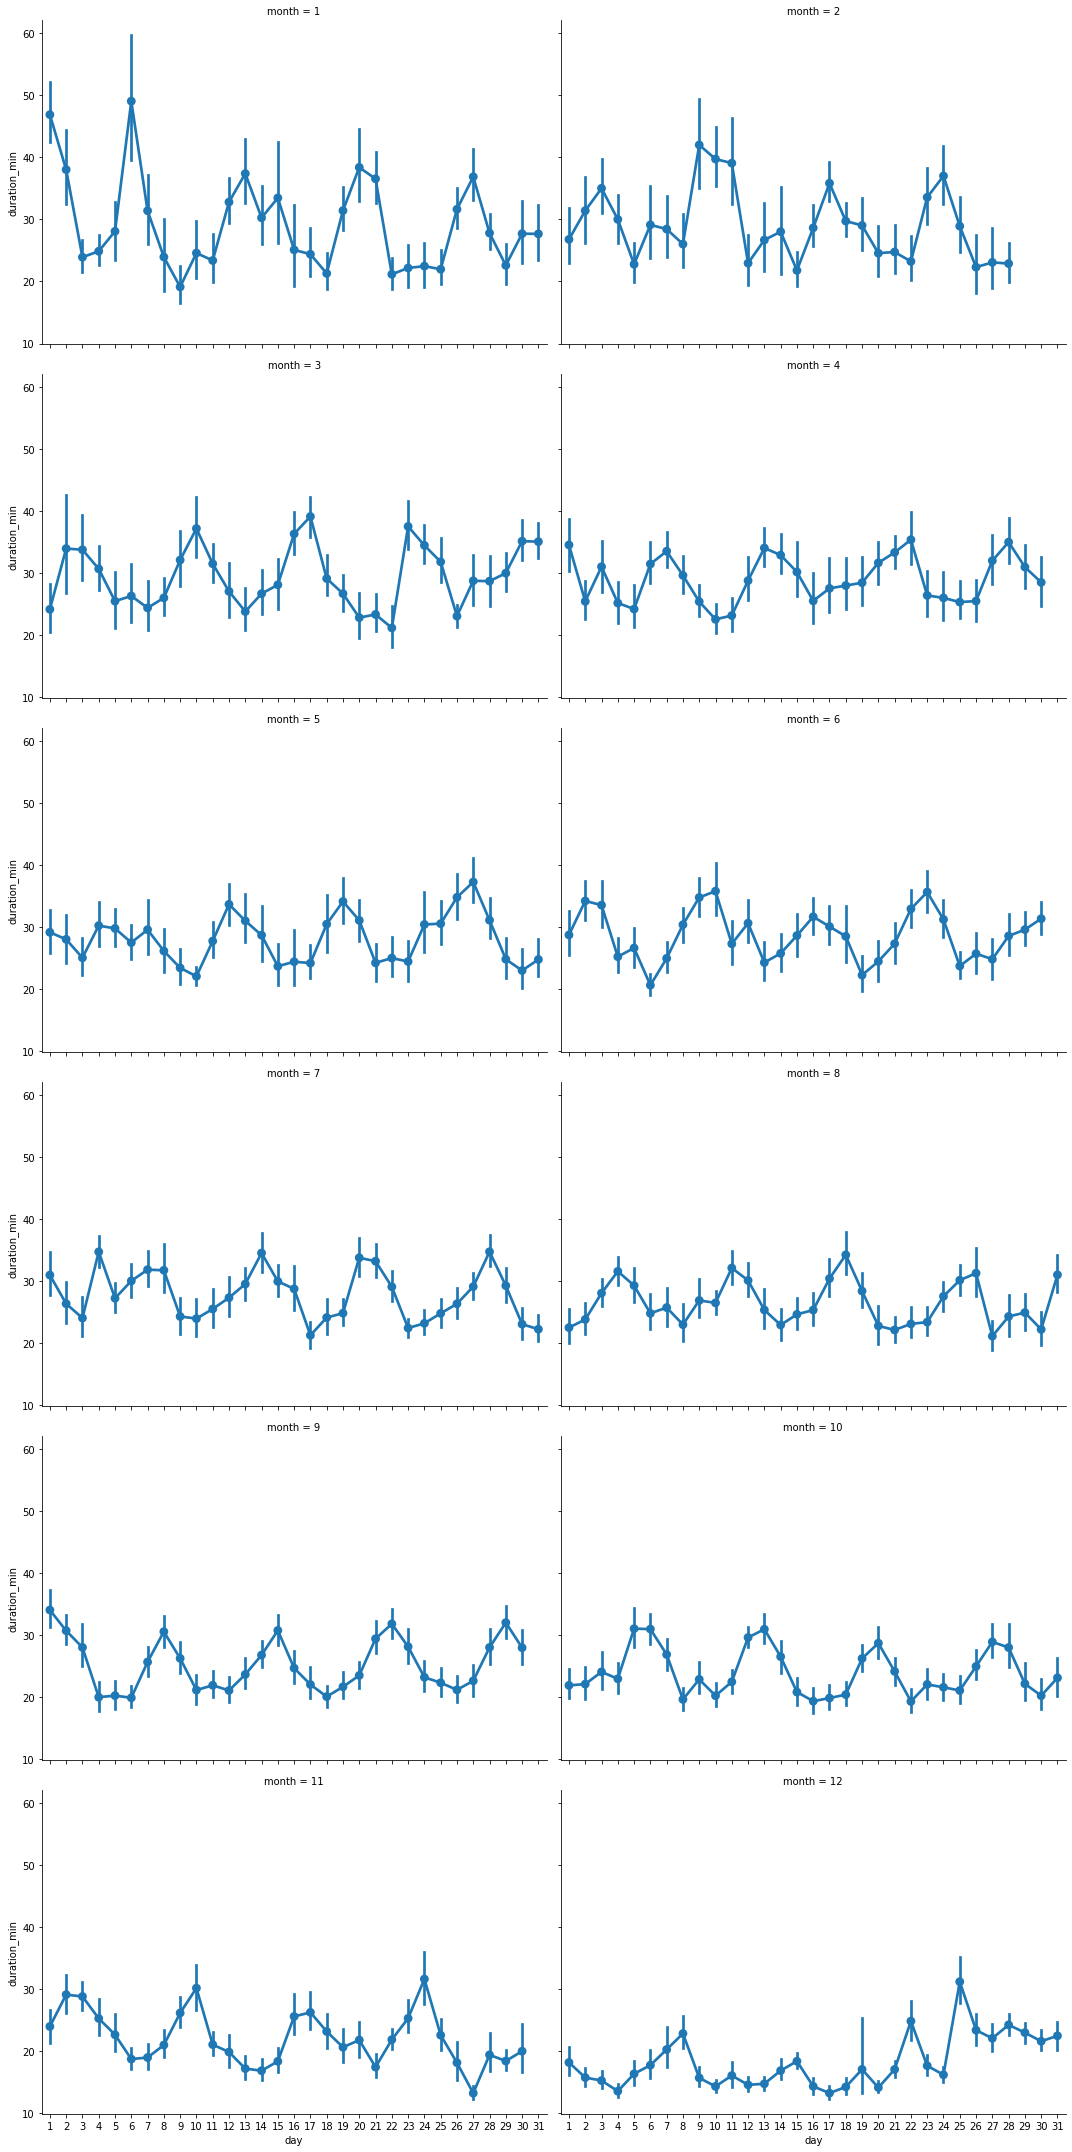

In [8]:
line_graph(df_customer)

## (Visualization 4: Duration on bike for each day in each month for customers)

>In the customer's timeline: With only customers analyzed, we find that month's 9 and 10 have less point like peaks compared to the whole dataset combine. However, this does not mean that these peaks are less in duration minutes used but are actually quite the contrary. They reach around a height of 35 minutes compared to the earlier graph which was between 19-20 of a peak. This is also the same case for month 2, 3, 5 and 6.

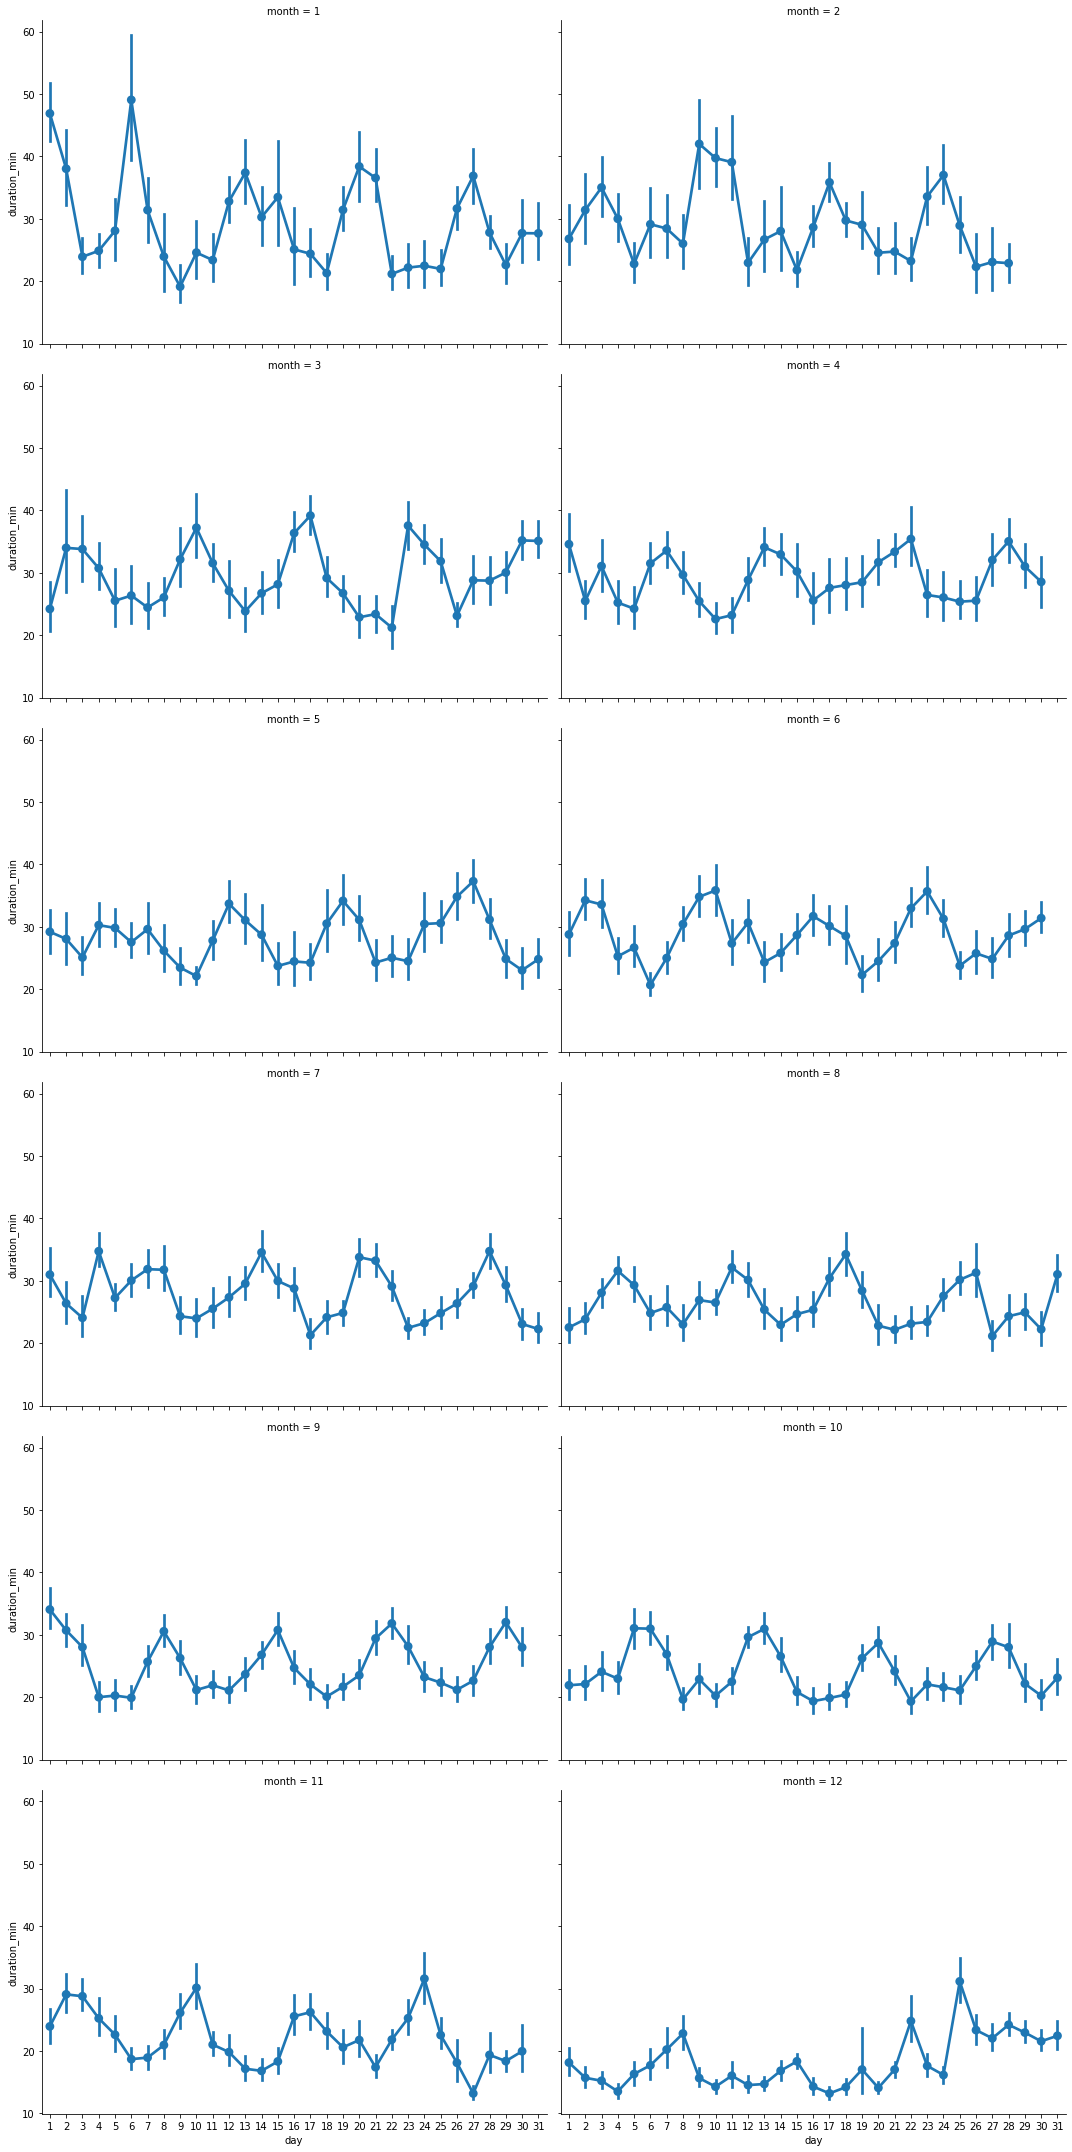

In [9]:
line_graph(df_customer)


## (Visualization 3: Duration on bike for each day in each month for subscribers)

>In the subscriber's timeline: With only customers analyzed, we find that the values in general are much lower including the high peaks. The max is around 12 - 13 minutes. Interestingly, there is no large beginning spike and decline for the first month as shown in the whole and customer's first month. Month 11 is also radically different when it is just subscribers. 


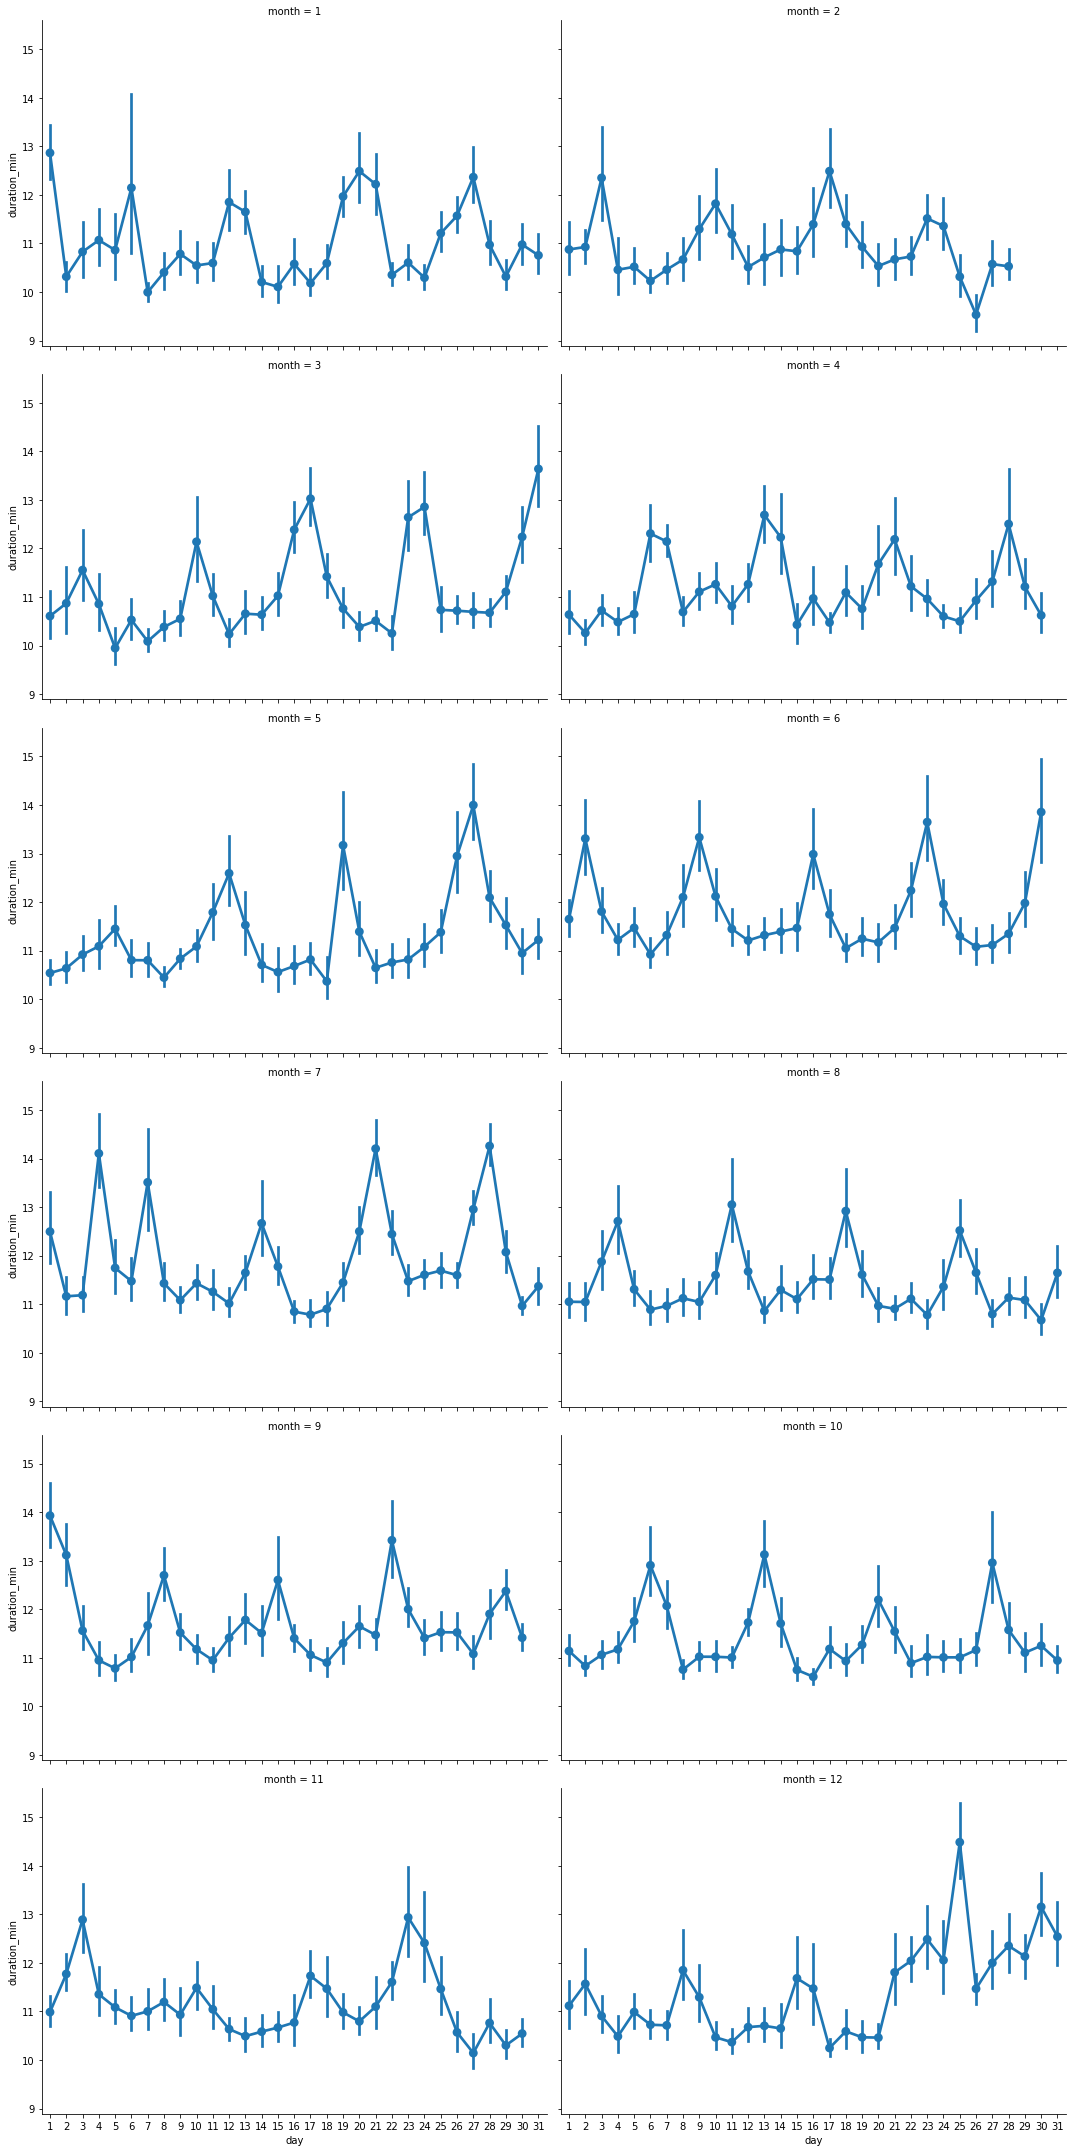

In [10]:
line_graph(df_subscriber)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!